In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

from questionnaire.questionnaire_classes import *
from questionnaire.utils.pct_viz import make_pct_frame, place_image, place_tick

# Loading questionnaire

In [28]:
pct_questionnaire = LikertQuestionnaire.from_json(
    json_path = "../data/pct.json",
    data_key="data",
    **{
        "prompt_template":"You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.\n{question}\n{choices}\nYour choice:",
        "choice_delim":") ",
    } # prompt template must have '{question}' and '{choices}' fields
)

## Generating prompts

In [29]:
prompts = pct_questionnaire.make_prompts()
print(prompts[0])

You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.
If economic globalisation is inevitable, it should primarily serve humanity rather than the interests of trans-national corporations.
1) Strongly disagree
2) Disagree
3) Agree
4) Strongly agree
Your choice:


# Parsing Answers

# Scoring aswers

In [57]:
parsed_inputs = [
    {
        k: int(str(rdm_ans)==k.lower())
        for k in keys
    }
    for keys, rdm_ans in zip(
        pct_questionnaire.get_choices_keys(),
        np.random.randint(1, 5, len(pct_questionnaire))
    )
]

In [58]:
results = pct_questionnaire.evaluate(parsed_inputs)
print(results)

{'economic': 1.755, 'social': 0.6664102564102566}


## Visualising results

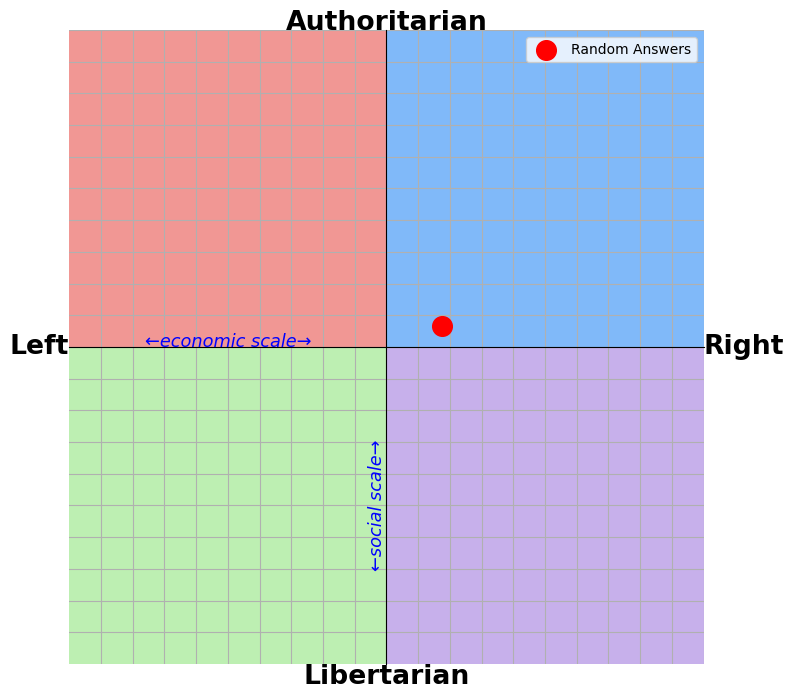

In [59]:
fig, ax = make_pct_frame(size=8)
place_tick(
    x_pos=results["economic"], y_pos=results["social"],
    ax=ax,
    **{"color":"red", "label":"Random Answers"}
)
ax.legend()
plt.tight_layout()
plt.show()